## Install and Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv file

In [ ]:
Path='location of file'

In [2]:
df=pd.read_csv(r'Path',encoding='ISO-8859-1')

#### Display the first few rows and last rows of the dataset 

In [6]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [7]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


#### Basic Info and Data Processing

In [8]:
df.shape

(6454, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


#### Check for duplicate rows and remove them

In [10]:
df.drop_duplicates(inplace=True)

#### Check for null values in dataset

In [13]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [14]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

#### Change Month names to English

In [15]:
month_names={'Janeiro':'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April',
             'Maio':'May', 'Junho':'June', 'Julho':'July','Agosto':'August', 
             'Setembro':'September', 'Outubro':'October', 'Novembro':'November', 'Dezembro':'December'}

In [16]:
df['month']=df['month'].map(month_names)

## Exploratory Data Analysis(EDA)

In [17]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


##### Monthly fire Analysis

In [18]:
#grouping with months and summation of fires in each month
monthly_fire=df.groupby('month')['number'].sum()

In [14]:
monthly_fire

month
April        28184.770
August       88050.435
December     57535.480
February     30839.050
January      47681.844
July         92319.113
June         55997.675
March        30709.405
May          34725.363
November     85508.054
October      88681.579
September    58578.305
Name: number, dtype: float64

In [19]:
#to find the month with maximum fires
max_fires_month=monthly_fire.idxmax()

In [16]:
max_fires_month

'July'

In [17]:
max_fire=monthly_fire[max_fires_month]

In [18]:
max_fire

92319.113

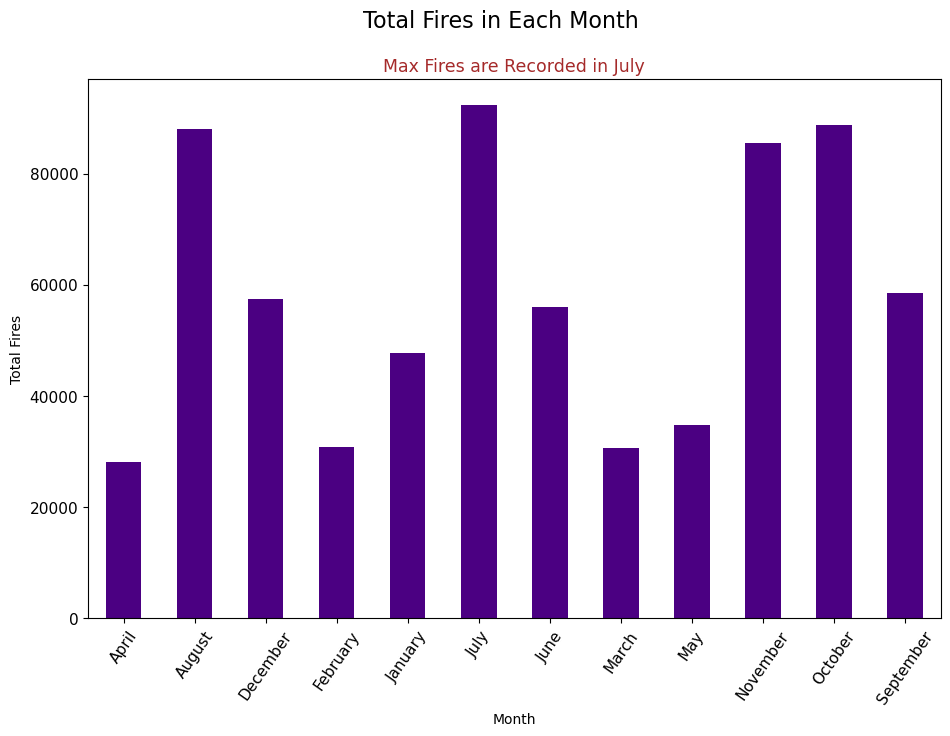

('July', 92319.113)

In [19]:
#visualize the monthly fires
plt.figure(figsize=(11,7))
monthly_fire.plot(kind='bar',color='indigo',xlabel="Month",ylabel="Total Fires",fontsize=11)
plt.xticks(rotation=55)
plt.suptitle("Total Fires in Each Month",fontsize=16)
plt.title(f"Max Fires are Recorded in {max_fires_month}",fontsize=12.5,color='brown')
plt.show()
max_fires_month,max_fire

##### Yearly Forest Fires Analysis

In [20]:
yearly_fires=df.groupby('year')['number'].sum()

In [21]:
max_fires_year=yearly_fires.idxmax()

In [22]:
max_fires=yearly_fires[max_fires_year]

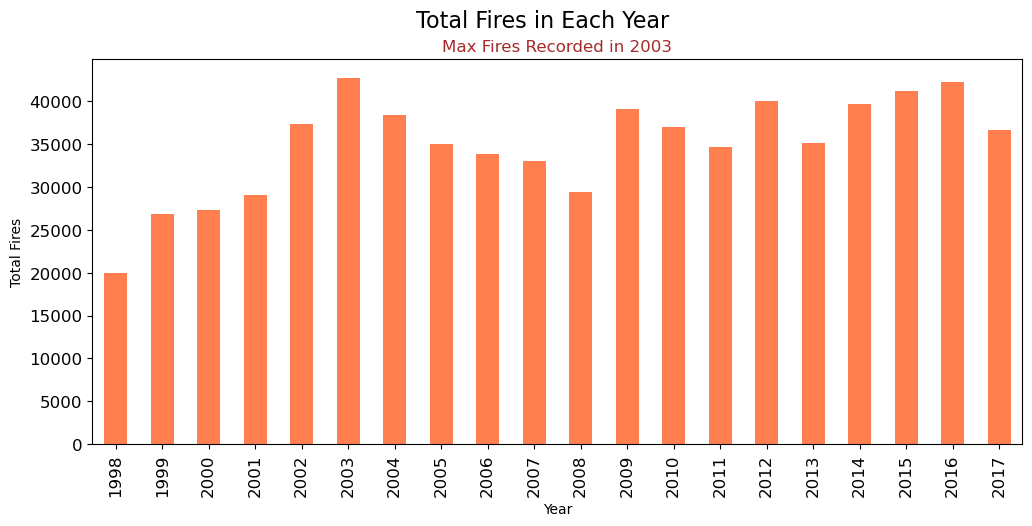

(2003, 42760.674)

In [23]:
plt.figure(figsize=(12,5))
yearly_fires.plot(kind='bar', color='coral', xlabel='Year',ylabel='Total Fires',fontsize=12)
plt.suptitle("Total Fires in Each Year",fontsize=16)
plt.title(f'Max Fires Recorded in {max_fires_year}',fontsize=12,color='brown')
plt.show()
max_fires_year,max_fires

###### Similarly using line graph

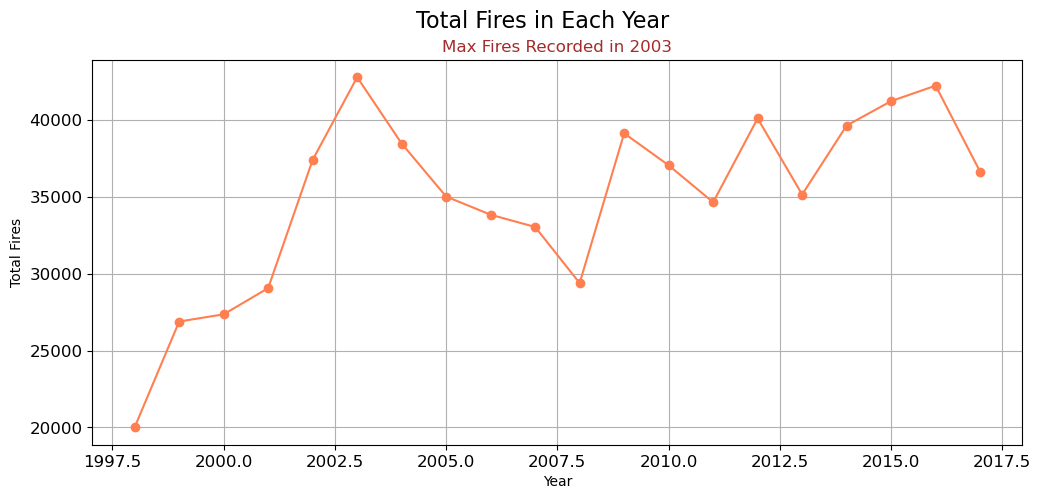

(2003, 42760.674)

In [24]:
plt.figure(figsize=(12,5))
yearly_fires.plot(kind='line', color='coral',marker='o', xlabel='Year',ylabel='Total Fires',fontsize=12)
plt.suptitle("Total Fires in Each Year",fontsize=16)
plt.title(f'Max Fires Recorded in {max_fires_year}',fontsize=12,color='brown')
plt.grid(True)
plt.show()
max_fires_year,max_fires

#### State Wise Forest Fire Analysis

In [25]:
state_fires=df.groupby('state')['number'].sum()

In [26]:
max_fires_state=state_fires.idxmax()
max_fires=state_fires[max_fires_state]

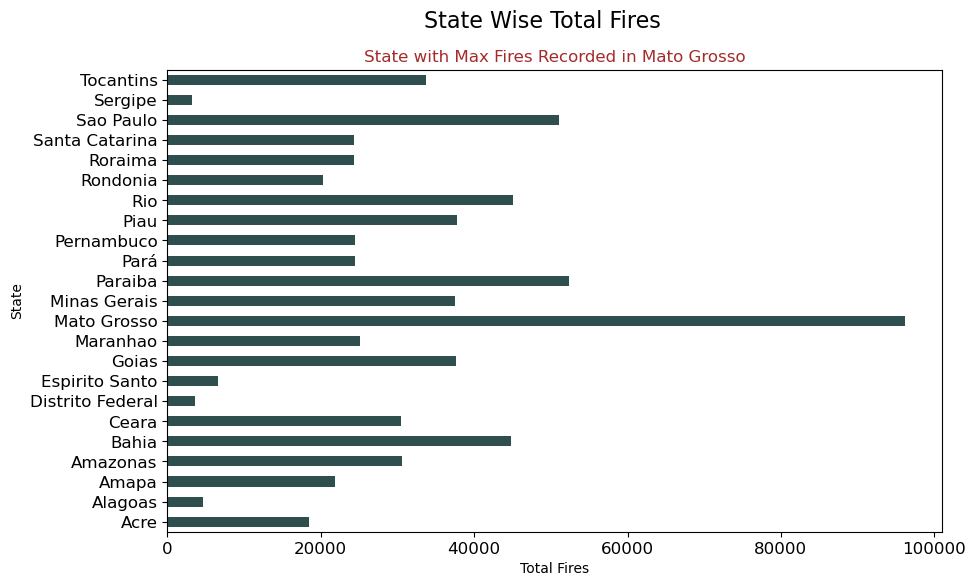

('Mato Grosso', 96246.028)

In [27]:
plt.figure(figsize=(10,6))
state_fires.plot(kind='barh',color='darkslategray',xlabel='Total Fires',ylabel='State',fontsize=12)
plt.suptitle("State Wise Total Fires",fontsize=16)
plt.title(f'State with Max Fires Recorded in {max_fires_state}',fontsize=12,color='brown')
plt.show()
max_fires_state,max_fires

### STATE FIRE REPORT FOR SAO PAULO

##### Year-wise Analysis-Sao Paulo

In [28]:
sao_paulo_fire=df[df['state']=='Sao Paulo']

In [29]:
yearly_sao_paulo_fire=sao_paulo_fire.groupby('year')['number'].sum()

In [30]:
max_yearly_sao_paulo_fire=yearly_sao_paulo_fire.idxmax()
max_sao_paulo_fire=yearly_sao_paulo_fire[max_yearly_sao_paulo_fire]

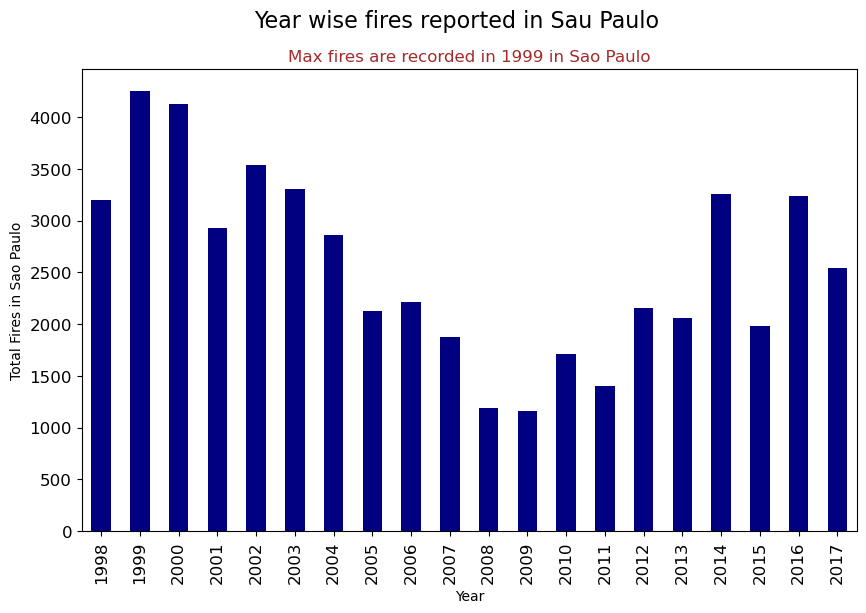

In [31]:
plt.figure(figsize=(10,6))
yearly_sao_paulo_fire.plot(kind='bar',color='navy',xlabel='Year',ylabel='Total Fires in Sao Paulo',fontsize=12)
plt.suptitle('Year wise fires reported in Sau Paulo',fontsize=16)
plt.title(f'Max fires are recorded in {max_yearly_sao_paulo_fire} in Sao Paulo',fontsize=12,color='brown')
plt.show()

##### Month-wise Fire Report(Sau Paulo)

In [32]:
sau_paulo_monthly_fires=sao_paulo_fire.groupby('month')['number'].sum()
max_fire_month_sau_paulo=sau_paulo_monthly_fires.idxmax()
max_sau_paulo_monthly_fires=sau_paulo_monthly_fires[max_fire_month_sau_paulo]

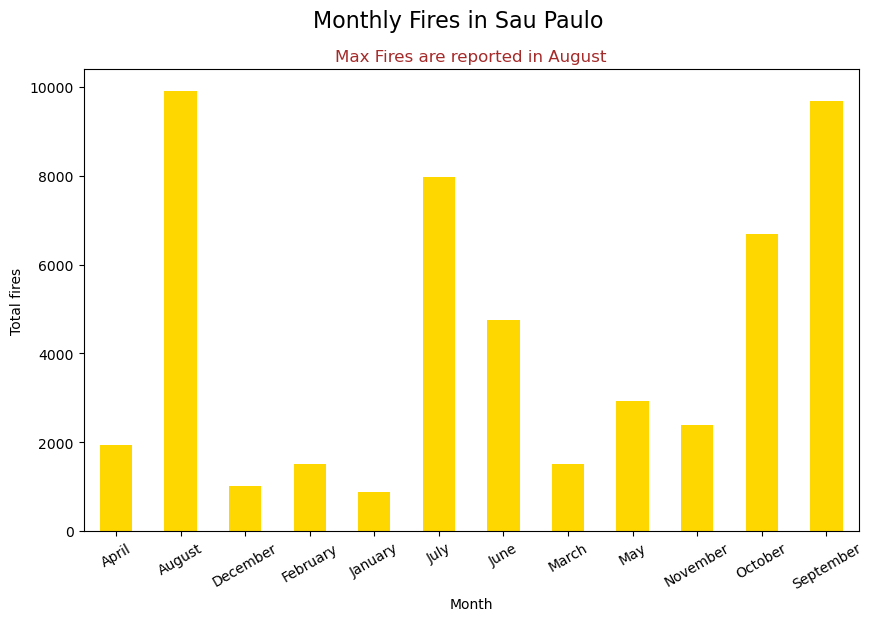

month
April        1949.000
August       9902.545
December     1009.000
February     1504.000
January       872.000
July         7961.000
June         4746.000
March        1507.000
May          2924.000
November     2394.000
October      6681.000
September    9671.653
Name: number, dtype: float64

In [33]:
plt.figure(figsize=(10,6))
sau_paulo_monthly_fires.plot(kind='bar',color='gold',xlabel='Month',ylabel='Total fires',fontsize=10)
plt.xticks(rotation=30)
plt.suptitle('Monthly Fires in Sau Paulo',fontsize=16)
plt.title(f'Max Fires are reported in {max_fire_month_sau_paulo}',color='brown',fontsize=12)
plt.show()
sau_paulo_monthly_fires

### Special Analysis

#### State-wise Average Fire Reports

In [34]:
state_avg_fires= df.groupby('state')['number'].mean().sort_values(ascending=False)

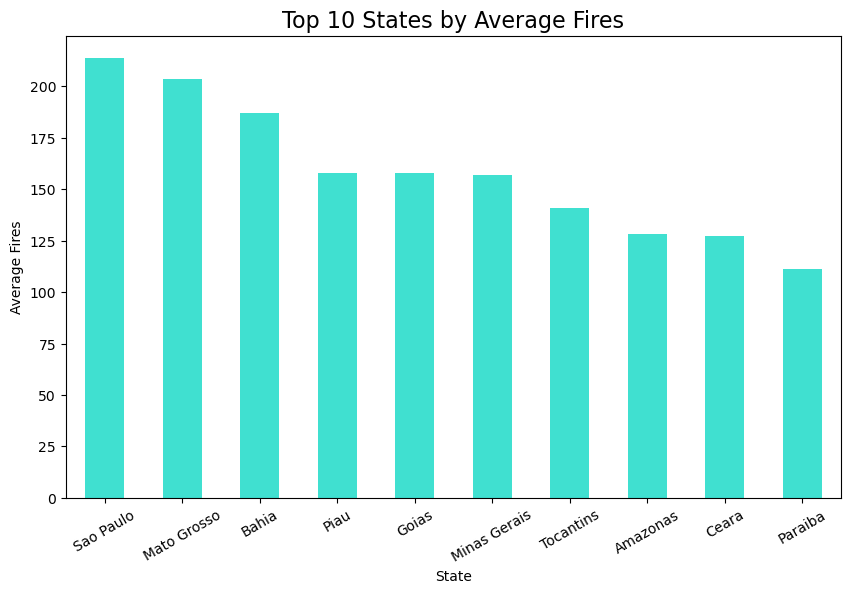

In [36]:
#visualize for the top 10 states by average fires recorded
plt.figure(figsize=(10,6))
state_avg_fires.head(10).plot(kind='bar',color='turquoise',xlabel='State',ylabel='Average Fires')
plt.title('Top 10 States by Average Fires',fontsize=16)
plt.xticks(rotation=30)
plt.show()

##### Monthly Fires Analysis in 2016 & 2017

In [21]:
fires_2016_17=df[(df['year']==2016)|(df['year']==2017)]

In [22]:
monthly_fires_2016_17=fires_2016_17.groupby(['year','month'])['number'].sum()

In [23]:
monthly_fires_2016_17.info()

<class 'pandas.core.series.Series'>
MultiIndex: 23 entries, (2016, 'April') to (2017, 'September')
Series name: number
Non-Null Count  Dtype  
--------------  -----  
23 non-null     float64
dtypes: float64(1)
memory usage: 433.0+ bytes


In [24]:
#convert the series to dataframe
df2=monthly_fires_2016_17.to_frame()

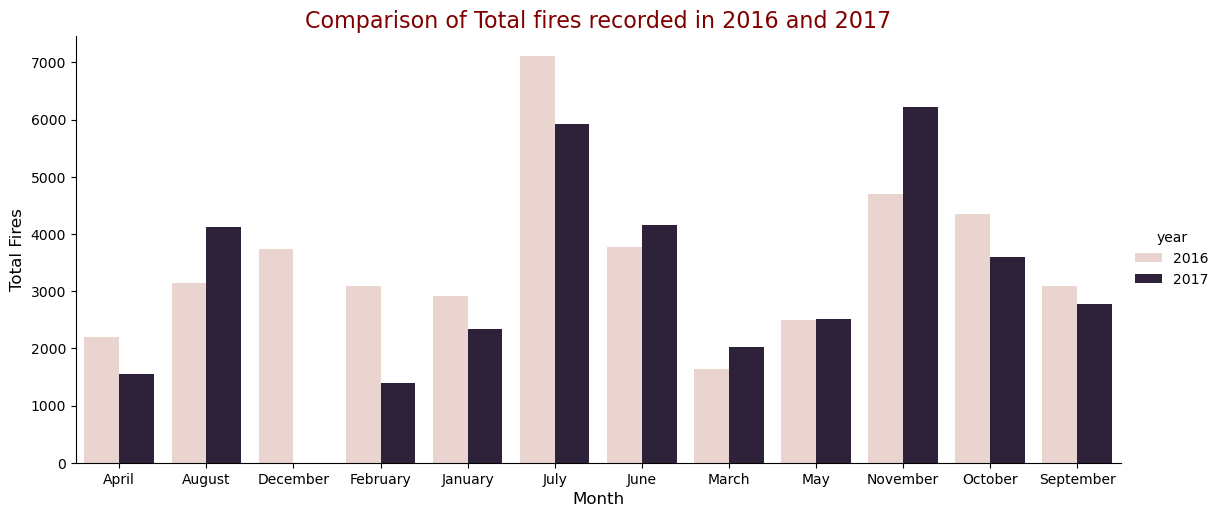

In [34]:
sns.catplot(x = 'month', y='number', 
               hue = 'year',data=df2, kind='bar',aspect=16/7)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Fires',fontsize=12)
plt.title('Comparison of Total fires recorded in 2016 and 2017',fontsize=16,color='maroon')
plt.show()

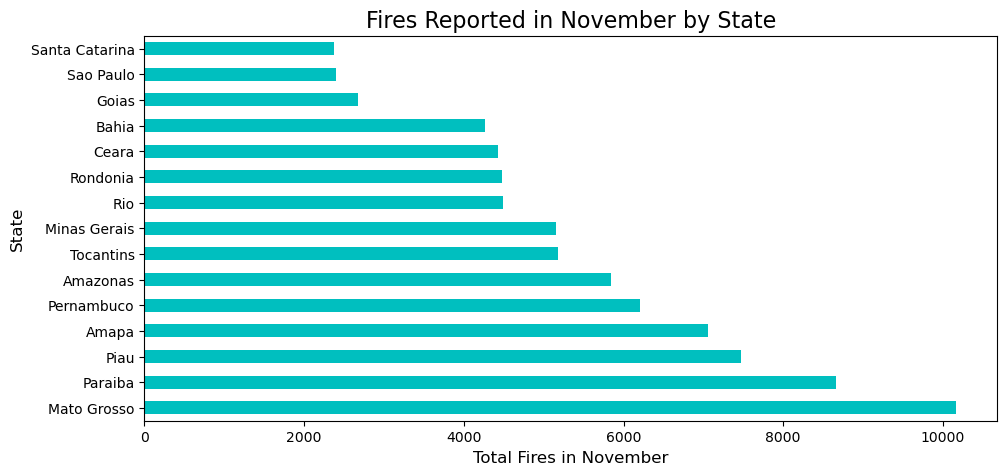

In [51]:
# Filter data for November month
November_fires= df[df['month'] == 'November']
November_state_fires = November_fires.groupby('state')['number'].sum()

# Visualization of November fires by state
plt.figure(figsize=(11, 5))
November_state_fires.sort_values(ascending=False).head(15).plot(kind='barh', color='c')
plt.title("Fires Reported in November by State", fontsize=16,)
plt.xlabel("Total Fires in November", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()

# Conclusion


##### The Amazon Rainforest fire analysis has provided some crucial insights into the occurrence of forest fires.
The main findings include:

1. **Month with Maximum Fires:** Providing a valuable insight into seasonal fire trends, We have identified the month with the highest number of fires.

2. **Year with Maximum Fires:** We have identified the Peak fire seasons by the analysis of yearly trends.

3. **State with Maximum Fires:** With the help of state wise data we are able to find the state with highest fires and we identified Mato Grosso as the state with highest fires recorded which emphasizes the need of attention in this area.

4. **Year-wise Analysis for Sau Paulo:** The year-wise distribution of fires in Sau Paulo has revealed the significant trends in fire occurrences over the time period.

5. **Monthly Comparision Analysis for 2016 and 2017:** A breakdown of fires by month in 2016 and 2017 has provided insight into when fires were most concentrated during those years.

6. **Average Fires by State:** With the help of average fires analysis by state has revealed the top states with most frequently forest fires.

These insights are very crucial for understanding of the patterns of forest fires and their impacts. The visualization and analysis provides a base for further research, which may include investigating the causes behind the trends observed. The results can be helpful for controlling and reducing the frequency of forest fires in the Amazon region, which is vital for preserving the rainforest and mitigating climate change.